## Problem Statement: Detecting Online Bidding Fraud by Bots

## Domain: Cyber Sicurity

### Context
Online auction platforms have become prevalent, offering a marketplace where users can bid on various items ranging from collectibles to real estate. These platforms thrive on the authenticity and fairness of the bidding process. However, the rise of sophisticated bot technologies has introduced significant challenges, including fraudulent bidding activities. Bots can manipulate auction outcomes, inflate prices artificially, and outbid genuine users, undermining the integrity and trust of the platform.

### Problem
The primary issue is the detection of fraudulent bidding activities conducted by bots on online auction platforms. These bots are designed to mimic human behavior, making it difficult to distinguish between legitimate bids and automated ones. The challenge lies in developing robust detection mechanisms that can accurately identify and mitigate the impact of these bots without disrupting the experience for genuine users.

### Objectives
1. **Develop Detection Algorithms:** Create and implement algorithms capable of identifying bot activity based on bidding patterns, frequency, timing, and other relevant indicators.
2. **Enhance Data Analysis:** Utilize machine learning and statistical analysis techniques to analyze large volumes of bidding data and detect anomalies indicative of bot activities.
3. **Improve User Trust:** Ensure the detection system is effective in reducing fraudulent activities, thereby enhancing the trust and satisfaction of legitimate users.
4. **Maintain Platform Integrity:** Protect the fairness and integrity of the auction process by preventing bots from manipulating outcomes.

### Challenges
1. **Sophistication of Bots:** Bots are increasingly sophisticated, often using machine learning techniques to mimic human bidding behaviors.
2. **Volume of Data:** The high volume of bids processed on large auction platforms requires efficient and scalable analysis techniques.
3. **Balancing Detection and User Experience:** Ensuring that detection mechanisms do not interfere with the experience of legitimate users while accurately identifying fraudulent activities.
4. **Real-Time Detection:** The need for real-time detection to prevent bots from influencing ongoing auctions.

### Desired Outcomes
1. **Effective Bot Detection:** A high rate of accurate detection of bot activities with minimal false positives.
2. **User Trust and Engagement:** Increased user trust and engagement due to the reduced presence of fraudulent activities.
3. **Fair Auction Processes:** Enhanced fairness and transparency in the bidding process, ensuring genuine users have a fair chance to win auctions.
4. **Continuous Improvement:** A detection system that evolves with emerging bot technologies to stay ahead of new threats.

By addressing these objectives and challenges, the goal is to safeguard online auction platforms from the detrimental effects of bot-driven fraud, ensuring a secure, fair, and trustworthy environment for all users.


### Importing Libraries

In [110]:
# Besic Libraries
import numpy as np
import pandas as pd

import warnings

warnings.simplefilter('ignore')

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [111]:
# Data Preprocessing Libraries
import datetime
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [112]:
# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline

In [113]:
# Model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [114]:
# Parameter Optimization
from sklearn.model_selection import GridSearchCV

In [115]:
# Validation 
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report


### Loading Datasets and EDA

In [116]:
bids = pd.read_csv("./Data/Dataset/bids.csv")
train = pd.read_csv("./Data/Dataset/train.csv")

In [117]:
print(f"The Shape of Bids dataset   :   {bids.shape}")
print(f"The Shape of Train dataset : {train.shape}")

The Shape of Bids dataset   :   (7656334, 9)
The Shape of Train dataset : (2013, 4)


In [118]:
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [119]:
train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [120]:
# Let's marge the both datasets
bids_df = pd.merge(train, bids, on="bidder_id", how="left")

In [121]:
print(f"The Shape of New dataset   :   {bids_df.shape}")

The Shape of New dataset   :   (3071253, 12)


In [122]:
bids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3071253 entries, 0 to 3071252
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   bidder_id        object 
 1   payment_account  object 
 2   address          object 
 3   outcome          float64
 4   bid_id           float64
 5   auction          object 
 6   merchandise      object 
 7   device           object 
 8   time             float64
 9   country          object 
 10  ip               object 
 11  url              object 
dtypes: float64(3), object(9)
memory usage: 281.2+ MB


In [123]:
bids_df.describe()

,outcome,bid_id,time
count,3.071253e+06,3.071224e+06,3.071224e+06
mean,1.342827e-01,3.838444e+06,9.696606e+15
std,3.409558e-01,2.191845e+06,5.256340e+13
min,0.000000e+00,1.000000e+00,9.631917e+15
25%,0.000000e+00,1.946030e+06,9.640958e+15
50%,0.000000e+00,3.836413e+06,9.700339e+15
75%,0.000000e+00,5.707636e+06,9.761303e+15
max,1.000000e+00,7.656331e+06,9.772885e+15


In [124]:
bids_df.isnull().sum().sum()

2933

In [125]:
bids_df.isnull().sum()

bidder_id             0
payment_account       0
address               0
outcome               0
bid_id               29
auction              29
merchandise          29
device               29
time                 29
country            2730
ip                   29
url                  29
dtype: int64

In [126]:
bids_df.columns

Index(['bidder_id', 'payment_account', 'address', 'outcome', 'bid_id',
       'auction', 'merchandise', 'device', 'time', 'country', 'ip', 'url'],
      dtype='object')

In [127]:
nobids_train = bids_df[pd.isnull(bids_df['bid_id'])]['bidder_id'].unique()

print(f"Number of unique bidder_ids with no bids: {len(nobids_train)}")

Number of unique bidder_ids with no bids: 29


In [128]:
# for all the missing values observations, drop it
bid = bids_df[~bids_df['bidder_id'].isin(nobids_train)]

print(pd.isnull(bid).any())

bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country             True
ip                 False
url                False
dtype: bool


In [129]:
# check the missing value ratio of the country entry
count_missing_values_ratio = pd.isnull(bid['country']).sum() / len(bid) * 100

print(f"{count_missing_values_ratio  * 100} % obserbations missing country data.")

8.794539245590682 % obserbations missing country data.


In [130]:
# for all the missing value observation, drop it
bid = bid.dropna()

print(pd.isnull(bid).any())

bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country            False
ip                 False
url                False
dtype: bool


In [131]:
# Check the unique number of each features

print(f"Total rows in bid    :    {len( bid)}")
print(f"Total bids in bid     :    {len(bid['bid_id'].unique())}")
print(f"Total bidder in bids     :    {len(bid['bidder_id'].unique())}")
print(f"Total payments in bids     :    {len(bid['payment_account'].unique())}")
print(f"Total address in bids    :    {len(bid['address'].unique())}")
print(f"Total auctions in bids  :    {len(bid['auction'].unique())}")
print(f"Total merchandise in bid    :    {len(bid['merchandise'].unique())}")
print(f"total device in bids:      {len(bid['device'].unique())}")
print(f"total country in bids:     {len(bid['country'].unique())}")
print(f"total ip in bids:          {len(bid['ip'].unique())}")
print(f"total url in bids:         {len(bid['url'].unique())}")

Total rows in bid    :    3068523
Total bids in bid     :    3068523
Total bidder in bids     :    1983
Total payments in bids     :    1983
Total address in bids    :    1983
Total auctions in bids  :    12740
Total merchandise in bid    :    10
total device in bids:      5726
total country in bids:     198
total ip in bids:          1028810
total url in bids:         663265


In [132]:
print(
    f"total bids made by robots in data set: {len(bid[bid['outcome'] == 1])}")
print(
    f"total bids made by human in data set:  {len(bid[bid['outcome'] == 0])}")

total bids made by robots in data set: 412153
total bids made by human in data set:  2656370


In [133]:
bid.shape

(3068523, 12)

In [134]:
bid['outcome'].value_counts()

outcome
0.0    2656370
1.0     412153
Name: count, dtype: int64

In [135]:
print(f"average bids per robot: %.0f" % float(len(
    bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['bidder_id'].unique())))
print(f"average bids per human:  %.0f" % float(len(
    bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['bidder_id'].unique())))
print(f"average bids per auction by robot: %.0f" % float(
    len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['auction'].unique())))
print(f"average bids per auction by human:  %.0f" % float(
    len(bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['auction'].unique())))
print(f"average bids per device by robot: %.0f" % float(
    len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['device'].unique())))
print(f"average bids per device by human:  %.0f" % float(
    len(bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['device'].unique())))
print(f"average bids per ip by robots: %.2f" % float(
    len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['ip'].unique())))
print(f"average bids per ip by human:  %.2f" % float(
    len(bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['ip'].unique())))
print(f"average bids per url by robot: %.2f" % float(
    len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['url'].unique())))
print(f"average bids per url by human:  %.2f" % float(
    len(bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['url'].unique())))

average bids per robot: 4001
average bids per human:  1413
average bids per auction by robot: 64
average bids per auction by human:  217
average bids per device by robot: 134
average bids per device by human:  516
average bids per ip by robots: 1.79
average bids per ip by human:  3.19
average bids per url by robot: 7.52
average bids per url by human:  4.36


In [136]:
bid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3068523 entries, 0 to 3071252
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   bidder_id        object 
 1   payment_account  object 
 2   address          object 
 3   outcome          float64
 4   bid_id           float64
 5   auction          object 
 6   merchandise      object 
 7   device           object 
 8   time             float64
 9   country          object 
 10  ip               object 
 11  url              object 
dtypes: float64(3), object(9)
memory usage: 304.3+ MB


In [137]:
bid.to_csv("./Data/Dataset/Cleaned_bids.csv", index=False)

### Feature Engineering and Feature Creation

In [138]:
import scipy.stats


In [139]:
def calculate_dataframe_entropy(data):
    """
    Calculate the entropy

    Parameters
    ----------
    data : dataframe
        a DataFrame containing original data

    Returns
    -------
    output: float
        computed entropy 

    Notes
    -----
    entropy is calculated with the following steps:
        1. compute the probabilities
        2. fit in the entropy formula
    """

    # calculates the probabilities
    p_data = data.value_counts() / len(data)

    # input probabilities to get the entropy
    entropy = scipy.stats.entropy(p_data)
    
    # returning the entropy
    return entropy


In [140]:
bid = bid.sort_values(by=['time'])

In [141]:
# number of bids a user per auction
bids_per_auction = bid.groupby(['auction', 'bidder_id']).size()
bids_per_auction = bids_per_auction.to_frame(name='bids_per_auction')

In [142]:
bids_per_auction

bids_per_auction
auction bidder_id                                              
00270   2d38a6af2ce96c1446f900aa4756b8975y9k3                 5
        384ba7c5a8ccf55d174080d9ad7de9b8mfysi                 1
        5dda8ade6b5d4065f3119a381516c227yoz8y                 2
        84c4b58a1491da3a30710bcdf61f87054xfq6                 7
        9655ccc7c0c193f1549475f02c54dce45kjw7               827
...                                                         ...
zzzy7   76ed824b414b5e690ff82e7cd2f5be52256my                 1
        8251041848182e6468c8119905a177dekmshg                 1
        bc3d08ad6ac94b8b5ce40a29b59899cakj3p5                 2
        c5863a228287327c9980d12a632985da9vi29                 7
        e9c8ee7f783723fe8496dd35232d88f2or1r1                 3

[124165 rows x 1 columns]

In [143]:
# number of bids per device
bids_per_device = bid.groupby(['device', 'bidder_id']).size()
bids_per_device = bids_per_device.to_frame(name='bids_per_device')

In [144]:
bids_per_device

bids_per_device
device   bidder_id                                             
phone0   0318e0a173f7c65db40116b903884c854x258                7
         037d9f10da403d8d5f94b6e2957a3702f6x07               17
         03aafab9868455b78f0723eda86698ba9v9rm               21
         047558bebab9292a5d4c85d6ee768784j2hdd               59
         054b51d059fe981ca8cc4e0d4c49aabb5mck7                3
...                                                         ...
phone999 e8291466de91b0eb4e1515143c7f74dexy2yr                1
         e9c8ee7f783723fe8496dd35232d88f2or1r1                1
         ec0c9e98cdf302274974ad212477f851iw35b                1
         f5b2bbad20d1d7ded3ed960393bec0f40u6hn              112
         f8c42ccd10c3fe515e53082f0cde9a18oxgws                6

[155796 rows x 1 columns]

In [145]:
# proportion of bots for each country
pbots_country = bid[bid['outcome'] == 1].groupby('country').size() / bid.groupby('country').size()
pbots_country = pbots_country.fillna(0)
pbots_country = pbots_country.to_frame(name='pbots_country')

In [146]:
pbots_country

,pbots_country
country,
ad,0.285714
ae,0.085222
af,0.044769
ag,0.666667
al,0.022230
...,...
ye,0.109170
za,0.086032
zm,0.029700


In [147]:
# proportion of bots per device
pbots_device = bid[bid['outcome'] == 1].groupby('device').size() / bid.groupby('device').size()

pbots_device = pbots_device.fillna(0)
pbots_device = pbots_device.to_frame(name='pbots_device')

In [148]:
pbots_device

,pbots_device
device,
phone0,0.009222
phone1,0.056095
phone10,0.023729
phone100,0.011111
phone1000,0.000000
...,...
phone995,0.000000
phone996,0.458810
phone997,0.017442


In [149]:
# number of unique ip to number of bids ratio
ip_bids_ratio = bid.groupby('bidder_id')['ip'].nunique() / bid.groupby('bidder_id')['bid_id'].nunique()
ip_bids_ratio = ip_bids_ratio.to_frame(name='ip_bids_ratio')

In [150]:
ip_bids_ratio

,ip_bids_ratio
bidder_id,
001068c415025a009fee375a12cff4fcnht8y,1.000000
0030a2dd87ad2733e0873062e4f83954mkj86,1.000000
00a0517965f18610417ee784a05f494d4dw6e,0.730496
00cc97158e6f4cb8eac3c0075918b7ffi5k8o,1.000000
01067975436d123f717ee5aba0dd4bbfa0937,0.728464
...,...
ff92ea4abd33ed38601287f0e1d6726dmgx1f,0.511392
ffacbed056cbfaa60c1fcf51f0d381bddr3ly,0.888889
ffaf0a972a6dcb3910fd6b16045781e2ava5y,1.000000


In [151]:
# mean per auction url entropy for each user
auction_url_entropy = bid.groupby(['auction', 'bidder_id'])['url'].apply(calculate_dataframe_entropy)

# Convert to DataFrame and add column name
auction_url_entropy = auction_url_entropy.to_frame(name='auction_url_entropy')

# Calculate mean entropy for each bidder_id
auction_url_entropy = auction_url_entropy.groupby('bidder_id')['auction_url_entropy'].mean().reset_index()

# Fill NA values with 0
auction_url_entropy = auction_url_entropy.fillna(0)


In [152]:
auction_url_entropy

,bidder_id,auction_url_entropy
0,001068c415025a009fee375a12cff4fcnht8y,0.000000
1,0030a2dd87ad2733e0873062e4f83954mkj86,0.000000
2,00a0517965f18610417ee784a05f494d4dw6e,0.383859
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,0.000000
4,01067975436d123f717ee5aba0dd4bbfa0937,0.005089
...,...,...
1978,ff92ea4abd33ed38601287f0e1d6726dmgx1f,1.225412
1979,ffacbed056cbfaa60c1fcf51f0d381bddr3ly,0.000000
1980,ffaf0a972a6dcb3910fd6b16045781e2ava5y,0.000000
1981,ffc4e2dd2cc08249f299cab46ecbfacfobmr3,0.207944


In [153]:
# merge the features back
bid = pd.merge(bid, bids_per_auction, on=['auction', 'bidder_id'], how='left')
bid = pd.merge(bid, pbots_country, on='country', how='left')
bid = pd.merge(bid, pbots_device, on='device', how='left')
bid = pd.merge(bid, ip_bids_ratio, on='bidder_id', how='left')
bid = pd.merge(bid, auction_url_entropy, on='bidder_id', how='left')

In [154]:
bid.shape

(3068523, 17)

In [155]:
bid.columns

Index(['bidder_id', 'payment_account', 'address', 'outcome', 'bid_id',
       'auction', 'merchandise', 'device', 'time', 'country', 'ip', 'url',
       'bids_per_auction', 'pbots_country', 'pbots_device', 'ip_bids_ratio',
       'auction_url_entropy'],
      dtype='object')

In [156]:
bid.head()

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url,bids_per_auction,pbots_country,pbots_device,ip_bids_ratio,auction_url_entropy
0,76218e14c379c12d599dae9e1c00b61a3i5b2,a3d2de7675556553a5f08e4c88d2c228sjo4q,ca8d4b018cb62966eebb2974f5a83b4fstk6z,0.0,2351187.0,6hpvy,sporting goods,phone1161,9.631917e+15,cz,121.169.96.51,f33fl83l4vrg6is,368,0.089199,0.020161,0.178624,1.463760
1,6e178db6d17d21aa88aaca5bf15c2761lc500,a3d2de7675556553a5f08e4c88d2c228mqaf6,0d11440b07e5e2c8550af74b728ab4edk47gk,0.0,2351200.0,jqx39,jewelry,phone99,9.631917e+15,sa,174.12.78.255,omwhmwzvrn6ycq6,15452,0.177281,0.055360,0.583490,0.885604
2,197e90906939267ace2422e78e8e83889znqp,faef6512727719c3dd147a06ba951c947c4fn,dd7151709002fc3dce968916d8ec00ede03vc,0.0,2351192.0,gst86,home goods,phone348,9.631917e+15,ma,154.151.182.60,vasstdc27m7nks3,2386,0.095494,0.065255,0.461730,0.809338
3,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,a3d2de7675556553a5f08e4c88d2c228sezhf,a3d2de7675556553a5f08e4c88d2c228nfhse,0.0,2351190.0,fagyq,sporting goods,phone1,9.631917e+15,in,161.192.187.34,3skc4v2r07bneta,851,0.133801,0.056095,0.196636,1.747853
4,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,a3d2de7675556553a5f08e4c88d2c228sezhf,a3d2de7675556553a5f08e4c88d2c228nfhse,0.0,2351188.0,64uay,sporting goods,phone0,9.631917e+15,ke,17.120.130.121,vasstdc27m7nks3,12,0.035496,0.009222,0.196636,1.747853


In [157]:
bid = pd.concat([bid.iloc[:, 3], bid.iloc[:, -6:]], axis=1)

In [158]:
bid.to_csv("./Data/Dataset/FeaturedBids.csv")

### Data Visualization

In [159]:
bidDF = pd.read_csv("./Data/Dataset/FeaturedBids.csv")

In [160]:
bidDF.shape

(3068523, 8)

In [161]:
bidDF.head()

,Unnamed: 0,outcome,url,bids_per_auction,pbots_country,pbots_device,ip_bids_ratio,auction_url_entropy
0,0,0.0,f33fl83l4vrg6is,368,0.089199,0.020161,0.178624,1.463760
1,1,0.0,omwhmwzvrn6ycq6,15452,0.177281,0.055360,0.583490,0.885604
2,2,0.0,vasstdc27m7nks3,2386,0.095494,0.065255,0.461730,0.809338
3,3,0.0,3skc4v2r07bneta,851,0.133801,0.056095,0.196636,1.747853
4,4,0.0,vasstdc27m7nks3,12,0.035496,0.009222,0.196636,1.747853


In [162]:
bidDF.drop(['Unnamed: 0', 'url'], axis=1, inplace=True)

In [163]:
bidDF.head()

,outcome,bids_per_auction,pbots_country,pbots_device,ip_bids_ratio,auction_url_entropy
0,0.0,368,0.089199,0.020161,0.178624,1.463760
1,0.0,15452,0.177281,0.055360,0.583490,0.885604
2,0.0,2386,0.095494,0.065255,0.461730,0.809338
3,0.0,851,0.133801,0.056095,0.196636,1.747853
4,0.0,12,0.035496,0.009222,0.196636,1.747853


In [164]:
bots = bidDF.loc[bidDF.outcome == 1]
humans = bidDF.loc[bidDF.outcome == 0]


<Axes: >

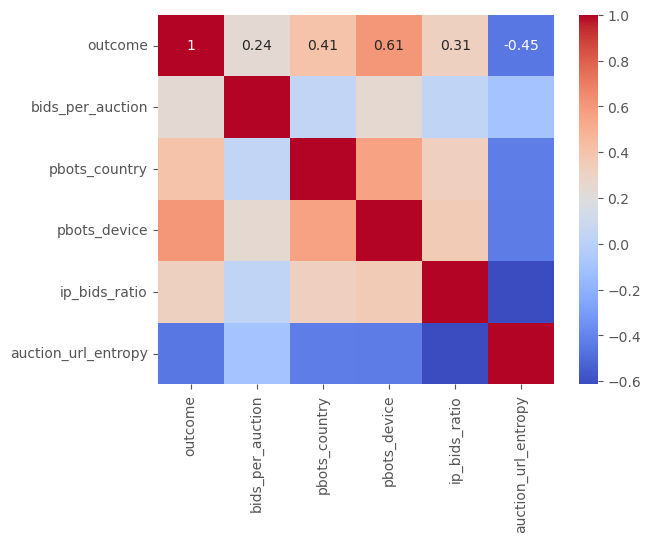

In [165]:
corr_mat = bidDF.corr()

sns.heatmap(corr_mat, annot=True, cmap='coolwarm')

<Axes: xlabel='bids_per_auction', ylabel='Count'>

<Axes: xlabel='bids_per_auction', ylabel='Count'>

<Axes: xlabel='pbots_country', ylabel='Count'>

<Axes: xlabel='pbots_country', ylabel='Count'>

<Axes: xlabel='pbots_device', ylabel='Count'>

<Axes: xlabel='pbots_device', ylabel='Count'>

<Axes: xlabel='ip_bids_ratio', ylabel='Count'>

<Axes: xlabel='ip_bids_ratio', ylabel='Count'>

<Axes: xlabel='auction_url_entropy', ylabel='Count'>

<Axes: xlabel='auction_url_entropy', ylabel='Count'>

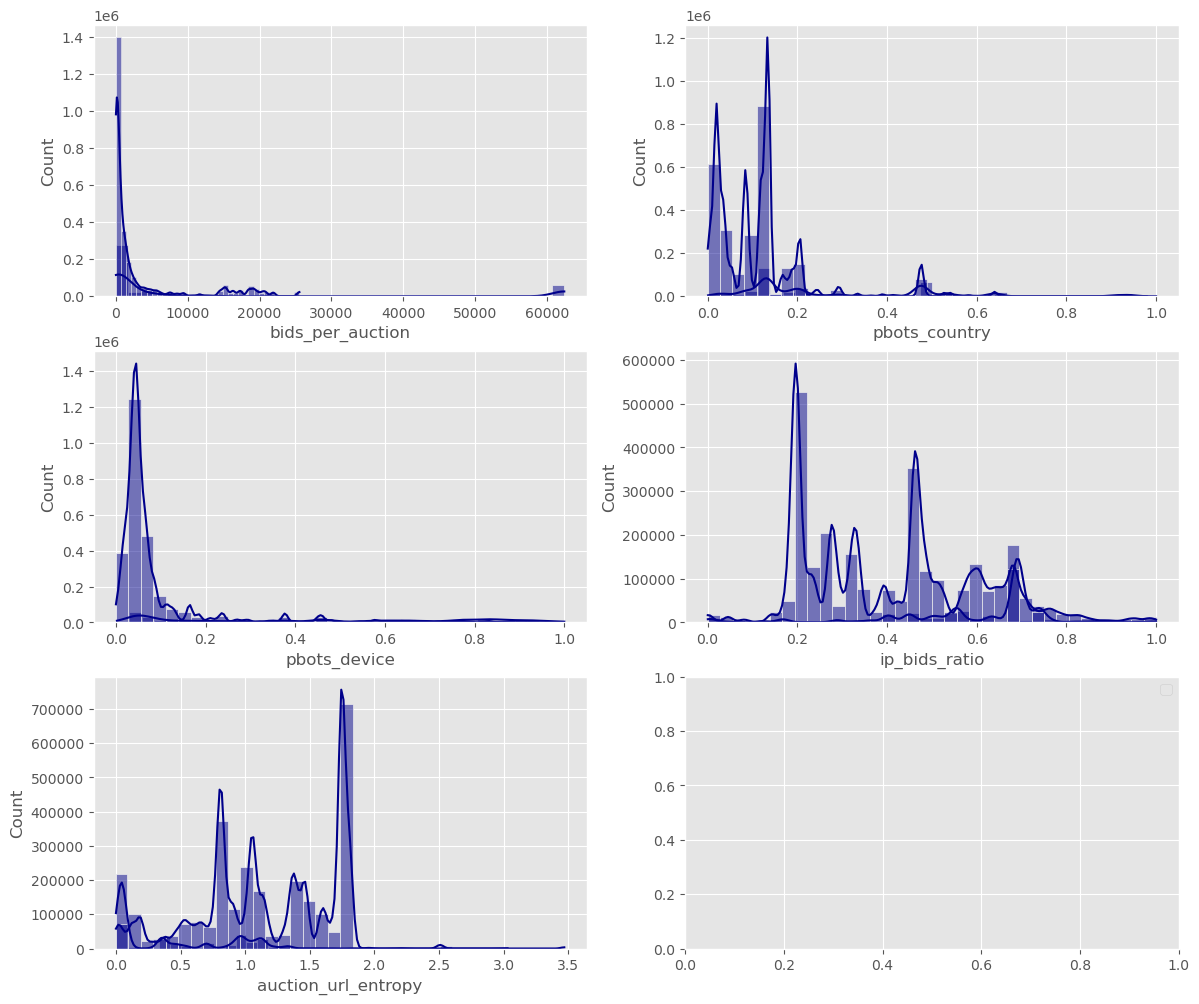

In [166]:
fig, ax = plt.subplots(3, 2, figsize=(14, 12), sharex=False)

# Use sns.histplot for histogram and sns.kdeplot for KDE plot
sns.histplot(
    bots['bids_per_auction'], bins=int(180/5), color='darkblue',
    kde=True, line_kws={'linewidth': 1.5}, ax=ax[0, 0]
)
sns.histplot(
    humans['bids_per_auction'], bins=int(180/5), color='darkblue',
    kde=True, line_kws={'linewidth': 1.5}, ax=ax[0, 0]
)

sns.histplot(
    bots['pbots_country'], bins=int(180/5), color='darkblue',
    kde=True, line_kws={'linewidth': 1.5}, ax=ax[0, 1]
)
sns.histplot(
    humans['pbots_country'], bins=int(180/5), color='darkblue',
    kde=True, line_kws={'linewidth': 1.5}, ax=ax[0, 1]
)

sns.histplot(
    bots['pbots_device'], bins=int(180/5), color='darkblue',
    kde=True, line_kws={'linewidth': 1.5}, ax=ax[1, 0]
)
sns.histplot(
    humans['pbots_device'], bins=int(180/5), color='darkblue',
    kde=True, line_kws={'linewidth': 1.5}, ax=ax[1, 0]
)

sns.histplot(
    bots['ip_bids_ratio'], bins=int(180/5), color='darkblue',
    kde=True, line_kws={'linewidth': 1.5}, ax=ax[1, 1]
)
sns.histplot(
    humans['ip_bids_ratio'], bins=int(180/5), color='darkblue',
    kde=True, line_kws={'linewidth': 1.5}, ax=ax[1, 1]
)


sns.histplot(
    bots['auction_url_entropy'], bins=int(180/5), color='darkblue',
    kde=True, line_kws={'linewidth': 1.5}, ax=ax[2, 0]
)
sns.histplot(
    humans['auction_url_entropy'], bins=int(180/5), color='darkblue',
    kde=True, line_kws={'linewidth': 1.5}, ax=ax[2, 0]
)

plt.legend(['bots', 'humans'])
plt.show()

### Data Splitting , Model Building and Model Evaluation

In [167]:
df = pd.read_csv("./Data/Dataset/FeaturedBids.csv")

In [168]:
df.shape

(3068523, 8)

In [169]:
df.head()

,Unnamed: 0,outcome,url,bids_per_auction,pbots_country,pbots_device,ip_bids_ratio,auction_url_entropy
0,0,0.0,f33fl83l4vrg6is,368,0.089199,0.020161,0.178624,1.463760
1,1,0.0,omwhmwzvrn6ycq6,15452,0.177281,0.055360,0.583490,0.885604
2,2,0.0,vasstdc27m7nks3,2386,0.095494,0.065255,0.461730,0.809338
3,3,0.0,3skc4v2r07bneta,851,0.133801,0.056095,0.196636,1.747853
4,4,0.0,vasstdc27m7nks3,12,0.035496,0.009222,0.196636,1.747853


In [170]:
df.drop(['Unnamed: 0', 'url'], axis=1, inplace=True)

In [171]:
df.shape

(3068523, 6)

In [172]:
df.head()

,outcome,bids_per_auction,pbots_country,pbots_device,ip_bids_ratio,auction_url_entropy
0,0.0,368,0.089199,0.020161,0.178624,1.463760
1,0.0,15452,0.177281,0.055360,0.583490,0.885604
2,0.0,2386,0.095494,0.065255,0.461730,0.809338
3,0.0,851,0.133801,0.056095,0.196636,1.747853
4,0.0,12,0.035496,0.009222,0.196636,1.747853


In [173]:
bid_train, bid_test = train_test_split(df, test_size=0.2, random_state=10)

In [174]:
bid_train.shape, bid_test.shape

((2454818, 6), (613705, 6))

In [175]:
bid_train['outcome'].value_counts()

outcome
0.0    2125389
1.0     329429
Name: count, dtype: int64

In [176]:
bots__train = bid_train.loc[bid_train.outcome == 1]
humans__train = bid_train.loc[bid_train.outcome == 0]

In [177]:
bots__train.shape, humans__train.shape

((329429, 6), (2125389, 6))

In [178]:
humans__train = humans__train.sample(n=len(bots__train))

humans__train.shape

(329429, 6)

In [179]:
balanced_df = pd.concat([bots__train, humans__train])

balanced_df.shape

(658858, 6)

In [180]:
X_train = balanced_df.iloc[:, -5:]
y_train = balanced_df['outcome']

X_test = bid_test.iloc[:, -5:]
y_test = bid_test['outcome']

print(f"The Shape Training set  :   {X_train.shape}")
print(f"The shape of training labels    :   {y_train.shape}")
print(f"The Shape Test set  :   {X_test.shape}")
print(f"The shape of test labels    :   {y_test.shape}")

The Shape Training set  :   (658858, 5)
The shape of training labels    :   (658858,)
The Shape Test set  :   (613705, 5)
The shape of test labels    :   (613705,)


In [181]:
# Randomly sample 50,000 rows from the training set
X_train = X_train.sample(n=50000)
y_train = y_train[X_train.index]

# Randomly sample 50,000 rows from the test set
X_test = X_test.sample(n=50000)
y_test = y_test[X_test.index]

# Print the shapes of the training and test sets along with their corresponding labels
print(f"The Shape of the Training set  :   {X_train.shape}")
print(f"The Shape of the Training labels    :   {y_train.shape}")
print(f"The Shape of the Test set  :   {X_test.shape}")
print(f"The Shape of the Test labels    :   {y_test.shape}")


The Shape of the Training set  :   (50000, 5)
The Shape of the Training labels    :   (50000,)
The Shape of the Test set  :   (50000, 5)
The Shape of the Test labels    :   (50000,)


In [182]:

def fitModel(X_train, y_train, X_test, y_test, model_name, model_algo, params, cv):
    np.random.seed(10)

    print(f"-"*75)
    print(f"Information")
    print(f"-"*75)
    print(f"Model Name :   {model_name}")
    print(f"The Shape Training set  :   {X_train.shape}")
    print(f"The shape of training labels    :   {y_train.shape}")
    print(f"The Shape Test set  :   {X_test.shape}")
    print(f"The shape of test labels    :   {y_test.shape}")
    print(f"-"*75)

    grid = GridSearchCV(
        estimator=model_algo,
        param_grid=params,
        scoring='accuracy',
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    print(f"Started fitting for model {model_name}")
    grid.fit(X_train, y_train)
    print(f"Completed fitting for model {model_name}")
    
    print(f"Started predictions for model {model_name}")
    y_pred = grid.predict(X_test)
    print(f"Completed predictions for model {model_name}")

    best_params = grid.best_params_
    best_score = grid.best_score_
    print(f"-"*75)
    print(f"Found Best Parameters and Best Score for {model_name}")
    print(f"Best Parameters :   {best_params}")
    print(f"Best Score :   {best_score}")
    print(f"-"*75)

    acc_score = accuracy_score(y_test, y_pred)
    cmat = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Accuracy Score :   {acc_score}")
    print(f"Confusion Matrix :\n{cmat}")
    print(f"F1 Score :   {f1}")
    print(f"Classification Report :\n{report}")
    print(f"-"*75)
    print(f"-"*75)


> # DecisionTreeClassifier

In [183]:


decTree = DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 6),
    'max_leaf_nodes': range(10, 15),
    'min_samples_split': range(2, 6)
}

fitModel(
    X_train = X_train, y_train = y_train,
    X_test = X_test, y_test = y_test,
    params = params,
    model_name = 'DecisionTreeClassifier',
    model_algo = decTree,
    cv = 5
)


---------------------------------------------------------------------------
Information
---------------------------------------------------------------------------
Model Name :   DecisionTreeClassifier
The Shape Training set  :   (50000, 5)
The shape of training labels    :   (50000,)
The Shape Test set  :   (50000, 5)
The shape of test labels    :   (50000,)
---------------------------------------------------------------------------
Started fitting for model DecisionTreeClassifier
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Completed fitting for model DecisionTreeClassifier
Started predictions for model DecisionTreeClassifier
Completed predictions for model DecisionTreeClassifier
---------------------------------------------------------------------------
Found Best Parameters and Best Score for DecisionTreeClassifier
Best Parameters :   {'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 14, 'min_samples_split': 3}
Best Score :   0.85078
------------------------

In [184]:
import time


start_time = time.time()
kwargs_regularize = dict(criterion='gini',
                         max_depth=4,
                         max_leaf_nodes=13,
                         min_samples_split=2)
dt = DecisionTreeClassifier(**kwargs_regularize)
dt.fit(X_train, y_train)

dt_time = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))


DecisionTreeClassifier(max_depth=4, max_leaf_nodes=13)

--- 0.05299234390258789 seconds ---


Feature importance of Decision Tree Model


<Axes: >

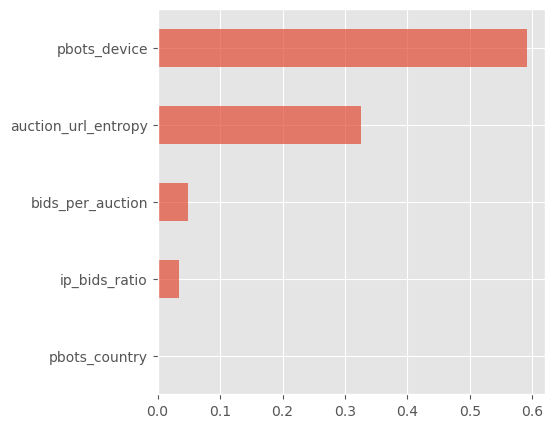

In [185]:
# Check feature importance and display in bar plot.
print('Feature importance of Decision Tree Model')
plt.style.use('ggplot')
fig = plt.figure(figsize=(5, 5))
feat_importances = pd.Series(dt.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(5).plot(kind='barh', alpha=0.7)
fig.savefig('dt_feature.png')

In [186]:
# Evaluation matrix
# predict
y_dt_pred = dt.predict(X_test)

# Accuracy
# accuracy score
print(f"Decision Tree Accuracy: {accuracy_score(y_dt_pred, y_test):.3f}")

Decision Tree Accuracy: 0.850


In [187]:
# AUC
# Plot ROC in one graph
from sklearn.metrics import auc, roc_curve


y_dt_score = dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _dt = roc_curve(y_test, y_dt_score)
roc_dt_auc = auc(fpr_dt, tpr_dt)

(0.0, 1.0)

(0.0, 1.005)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic [DecisionTreeClassifier]')

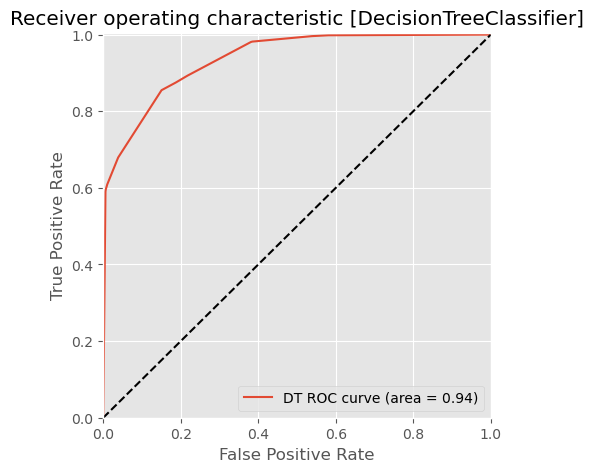

In [188]:
fig = plt.figure(figsize=(5, 5))
plt.plot(fpr_dt, tpr_dt, label='DT ROC curve (area = %0.2f)' % roc_dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic [DecisionTreeClassifier]')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_dt_auc.png')

In [189]:
# Classification Report
print('Classification Report of Decision Tree Model')
print(classification_report(y_test, y_dt_pred))

Classification Report of Decision Tree Model
              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91     43331
         1.0       0.47      0.86      0.60      6669

    accuracy                           0.85     50000
   macro avg       0.72      0.85      0.76     50000
weighted avg       0.91      0.85      0.87     50000



> #  RandomForest

In [190]:
rf_C = RandomForestClassifier()

params = {
    'n_estimators': [100, 500, 1000, 1500],
    'max_depth': range(3, 6),
    'max_leaf_nodes': range(8, 12),
    'max_features': ['sqrt', 'auto', 'log2']
}

fitModel(
    X_train = X_train, y_train = y_train,
    X_test = X_test, y_test = y_test,
    params = params,
    model_name = 'RandomForestClassifier',
    model_algo = rf_C,
    cv = 5 
)

---------------------------------------------------------------------------
Information
---------------------------------------------------------------------------
Model Name :   RandomForestClassifier
The Shape Training set  :   (50000, 5)
The shape of training labels    :   (50000,)
The Shape Test set  :   (50000, 5)
The shape of test labels    :   (50000,)
---------------------------------------------------------------------------
Started fitting for model RandomForestClassifier
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Completed fitting for model RandomForestClassifier
Started predictions for model RandomForestClassifier
Completed predictions for model RandomForestClassifier
---------------------------------------------------------------------------
Found Best Parameters and Best Score for RandomForestClassifier
Best Parameters :   {'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 10, 'n_estimators': 100}
Best Score :   0.8956
-------------------------

In [191]:
kwargs_regularize = dict(
                         max_depth=5,
                         max_features = 'log2',
                         max_leaf_nodes=11,
                         n_estimators=1000)
rf = RandomForestClassifier(**kwargs_regularize)
rf.fit(X_train, y_train)

rf_time = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

RandomForestClassifier(max_depth=5, max_features='log2', max_leaf_nodes=11,
                       n_estimators=1000)

--- 1461.7541010379791 seconds ---


Feature importance of Decision Tree Model


<Axes: >

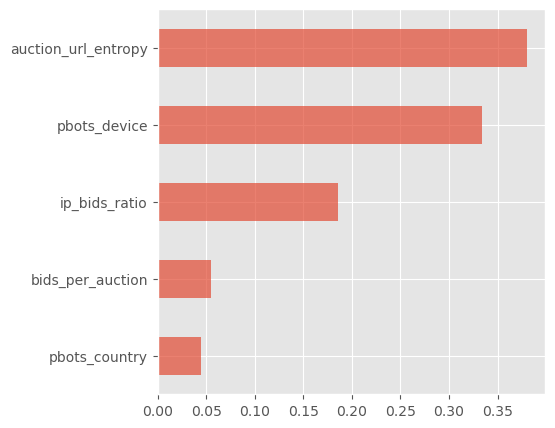

In [192]:
# Check feature importance and display in bar plot.
print('Feature importance of Decision Tree Model')
plt.style.use('ggplot')
fig = plt.figure(figsize=(5, 5))
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(5).plot(kind='barh', alpha=0.7)
fig.savefig('rff_feature.png')

In [193]:
# Evaluation matrix
# predict
y_rf_pred = rf.predict(X_test)

# Accuracy
# accuracy score
print(f"Random Forest Accuracy: {accuracy_score(y_rf_pred, y_test):.3f}")

Random Forest Accuracy: 0.928


(0.0, 1.0)

(0.0, 1.005)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic [Random Forest Classifier]')

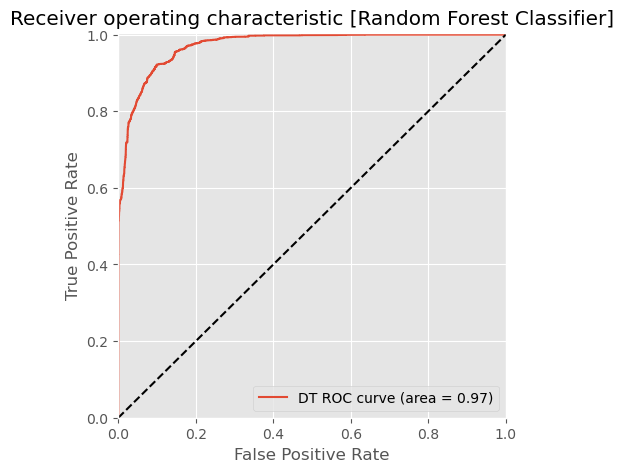

In [195]:
# AUC
# Plot ROC in one graph

y_rf_score = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _rf = roc_curve(y_test, y_rf_score)
roc_rf_auc = auc(fpr_rf, tpr_rf)
fig = plt.figure(figsize=(5, 5))
plt.plot(fpr_rf, tpr_rf, label='DT ROC curve (area = %0.2f)' % roc_rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic [Random Forest Classifier]')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_rf_auc.png')

In [196]:
# Classification Report
print('Classification Report of Random Forest Model')
print(classification_report(y_test, y_rf_pred))

Classification Report of Random Forest Model
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96     43331
         1.0       0.69      0.85      0.76      6669

    accuracy                           0.93     50000
   macro avg       0.83      0.90      0.86     50000
weighted avg       0.94      0.93      0.93     50000



> # GradientBoostingClassifier

In [197]:
gb = GradientBoostingClassifier()

params = {
    'max_depth': range(3, 6),
    'max_leaf_nodes': range(8, 11)
}

fitModel(
    X_train = X_train, y_train = y_train,
    X_test = X_test, y_test = y_test,
    params = params,
    model_name = 'GradientBoostingClassifier',
    model_algo = gb,
    cv = 5
)

---------------------------------------------------------------------------
Information
---------------------------------------------------------------------------
Model Name :   GradientBoostingClassifier
The Shape Training set  :   (50000, 5)
The shape of training labels    :   (50000,)
The Shape Test set  :   (50000, 5)
The shape of test labels    :   (50000,)
---------------------------------------------------------------------------
Started fitting for model GradientBoostingClassifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Completed fitting for model GradientBoostingClassifier
Started predictions for model GradientBoostingClassifier
Completed predictions for model GradientBoostingClassifier
---------------------------------------------------------------------------
Found Best Parameters and Best Score for GradientBoostingClassifier
Best Parameters :   {'max_depth': 5, 'max_leaf_nodes': 9}
Best Score :   0.9865400000000001
--------------------------------------

In [198]:
start_time = time.time()

gb = GradientBoostingClassifier(n_estimators=100, 
                                max_depth=5, 
                                max_features='sqrt',
                                max_leaf_nodes=10)
gb.fit(X_train, y_train)

gb_time = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

GradientBoostingClassifier(max_depth=5, max_features='sqrt', max_leaf_nodes=10)

--- 2.4502296447753906 seconds ---


Feature importance of Gradient Boosting Model


<Axes: >

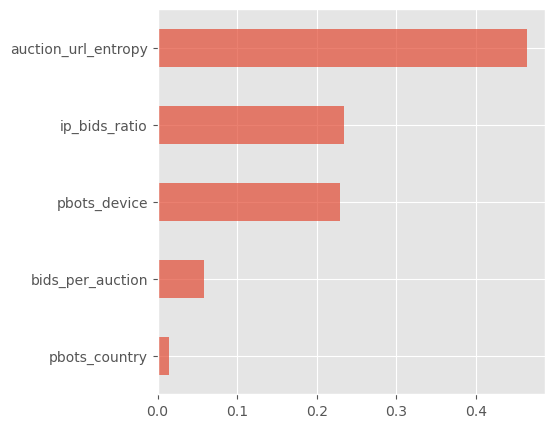

In [199]:
# Check feature importance and display in bar plot.
print('Feature importance of Gradient Boosting Model')
plt.style.use('ggplot')
fig = plt.figure(figsize=(5, 5))
feat_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(5).plot(kind='barh', alpha=0.7)
fig.savefig('gb_feature.png')

In [200]:
# Accuracy
y_gb_pred = gb.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_gb_pred, y_test):.3f}")

Gradient Boosting Accuracy: 0.980


<Figure size 500x500 with 0 Axes>

(0.0, 1.0)

(0.0, 1.005)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic[GB]')

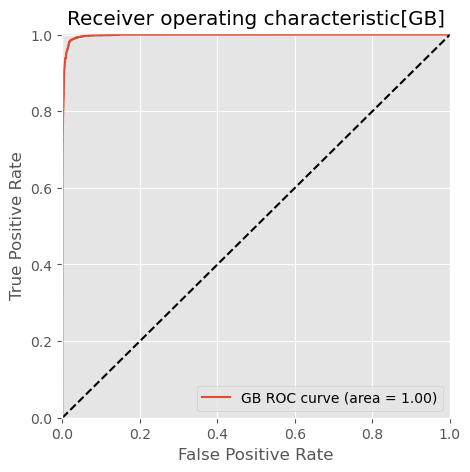

In [201]:
# Plot ROC in one graph
y_gb_score = gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, _gb = roc_curve(y_test, y_gb_score)
roc_gb_auc = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(5, 5))
plt.plot(fpr_gb, tpr_gb, label='GB ROC curve (area = %0.2f)' % roc_gb_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic[GB]')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_gb_auc.png')

In [202]:
print('Classification Report of Gradient Boosting Model')
print(classification_report(y_test, y_gb_pred))

Classification Report of Gradient Boosting Model
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     43331
         1.0       0.88      0.98      0.93      6669

    accuracy                           0.98     50000
   macro avg       0.94      0.98      0.96     50000
weighted avg       0.98      0.98      0.98     50000



> # XGBoost

In [203]:
xgb = XGBClassifier()

params = {
    'n_estimators': [100, 500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2],
}

fitModel(
    X_train = X_train, y_train = y_train,
    X_test = X_test, y_test = y_test,
    params = params,
    model_name = 'XGBClassifier',
    model_algo = xgb,
    cv = 5
)

---------------------------------------------------------------------------
Information
---------------------------------------------------------------------------
Model Name :   XGBClassifier
The Shape Training set  :   (50000, 5)
The shape of training labels    :   (50000,)
The Shape Test set  :   (50000, 5)
The shape of test labels    :   (50000,)
---------------------------------------------------------------------------
Started fitting for model XGBClassifier
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Completed fitting for model XGBClassifier
Started predictions for model XGBClassifier
Completed predictions for model XGBClassifier
---------------------------------------------------------------------------
Found Best Parameters and Best Score for XGBClassifier
Best Parameters :   {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1500}
Best Score :   0.99846
---------------------------------------------------------------------------
Accuracy Scor

In [204]:
start_time = time.time()

xgb = XGBClassifier(
    gamma = 0,
    learning_rate = 0.1,
    max_depth = 7,
    n_estimators = 1000
)
xgb.fit(X_train, y_train)

xgb_time = time.time() - start_time
print("--- %s seconds ---" % (time.time() - start_time))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

--- 2.66960072517395 seconds ---


Feature importance of Gradient Boosting Model


<Axes: >

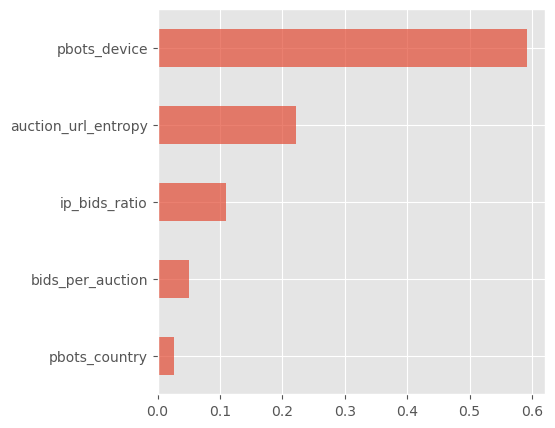

In [205]:
# Check feature importance and display in bar plot.
print('Feature importance of Gradient Boosting Model')
plt.style.use('ggplot')
fig = plt.figure(figsize=(5, 5))
feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(5).plot(kind='barh', alpha=0.7)
fig.savefig('xgb_feature.png')

In [206]:
# Accuracy
y_xgb_pred = xgb.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_xgb_pred, y_test):.3f}")

Gradient Boosting Accuracy: 0.998


<Figure size 500x500 with 0 Axes>

(0.0, 1.0)

(0.0, 1.005)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic[XGB]')

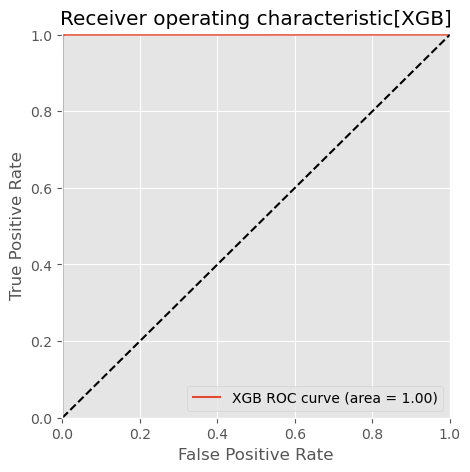

In [207]:
# Plot ROC in one graph
y_xgb_score = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test, y_xgb_score)
roc_xgb_auc = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(5, 5))
plt.plot(fpr_xgb, tpr_xgb, label='XGB ROC curve (area = %0.2f)' % roc_xgb_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic[XGB]')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_xgb_auc.png')

In [208]:
print('Classification Report of Gradient Boosting Model')
print(classification_report(y_test, y_xgb_pred))

Classification Report of Gradient Boosting Model
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     43331
         1.0       0.99      1.00      0.99      6669

    accuracy                           1.00     50000
   macro avg       0.99      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



### Model Comparings

In [209]:
from sklearn.metrics import roc_auc_score


dt_metrics = [accuracy_score(y_test, y_dt_pred), precision_score(y_test, y_dt_pred),
              recall_score(y_test, y_dt_pred), f1_score(
                  y_test, y_dt_pred),
              roc_auc_score(y_test, y_dt_pred), dt_time]
rf_metrics = [accuracy_score(y_test, y_rf_pred), precision_score(y_test, y_rf_pred),
              recall_score(y_test, y_rf_pred), f1_score(
                  y_test, y_rf_pred),
              roc_auc_score(y_test, y_rf_pred), rf_time]
gb_metrics = [accuracy_score(y_test, y_gb_pred), precision_score(y_test, y_gb_pred),
              recall_score(y_test, y_gb_pred), f1_score(
                  y_test, y_gb_pred),
              roc_auc_score(y_test, y_gb_pred), gb_time]
xgb_metrics = [accuracy_score(y_test, y_xgb_pred), precision_score(y_test, y_xgb_pred),
              recall_score(y_test, y_xgb_pred), f1_score(
                  y_test, y_xgb_pred),
              roc_auc_score(y_test, y_xgb_pred), xgb_time]

Text(0.5, 1.0, 'Model Comparison')

Text(0, 0.5, 'Score')

([<matplotlib.axis.XTick at 0x29a48445b90>,
 [Text(0.30000000000000004, 0, 'Accuracy'),
  Text(1.3, 0, 'Precision'),
  Text(2.3, 0, 'Recall'),
  Text(3.3, 0, 'F1'),
  Text(4.3, 0, 'ROC AUC')])

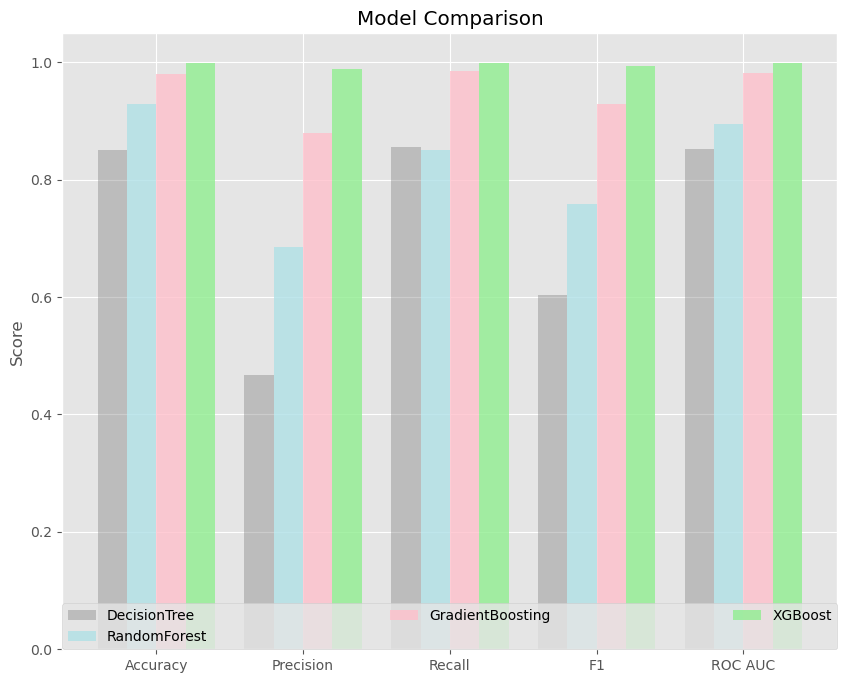

In [212]:
fig, ax = plt.subplots(figsize=(10, 8))
index = np.arange(5)
width = 0.2

b1 = plt.bar(index, dt_metrics[0:5], width, alpha=0.4, color='grey', label='DecisionTree')
b2 = plt.bar(index + width, rf_metrics[0:5], width, alpha=0.8, color='powderblue', label='RandomForest')
b3 = plt.bar(index + 2 * width, gb_metrics[0:5], width, alpha=0.8, color='pink', label='GradientBoosting')
b4 = plt.bar(index + 3 * width, xgb_metrics[0:5], width, alpha=0.8, color='lightgreen', label='XGBoost')

plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(index + 1.5 * width, ('Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC'))
plt.legend(loc='lower center', ncol=3, mode="expand", borderaxespad=0.)

plt.show()
fig.savefig('model_comparison.png')

In [211]:
# different metric and different models
label = ["Accuracy_score", "Precision_score",
         "Recall_Score", "F1_score", "ROC_AUC_score", "Time(s)"]
table = pd.DataFrame({'Decision Tree': dt_metrics,
                      'Random Forest': rf_metrics, 'Gradient Boosting': gb_metrics, 'XGBoost': xgb_metrics})
table = table.transpose()
table.columns = label
table.transpose().round(3)

,Decision Tree,Random Forest,Gradient Boosting,XGBoost
Accuracy_score,0.850,0.928,0.980,0.998
Precision_score,0.467,0.685,0.879,0.989
Recall_Score,0.855,0.851,0.985,0.999
F1_score,0.604,0.759,0.929,0.994
ROC_AUC_score,0.852,0.895,0.982,0.999
Time(s),0.053,1461.754,2.450,2.670


### Conclusion:

XGBoost emerged as the best performing model across all key metrics (accuracy, precision, recall, F1 score, and ROC AUC score), demonstrating its ability to handle complex data and produce highly accurate and reliable predictions. However, this performance comes at the cost of increased training time compared to Gradient Boosting. Gradient Boosting also showed strong performance, particularly in recall and F1 score, making it a viable alternative when slightly faster training time is desired. Random Forest, while performing well in accuracy and recall, took significantly longer to train and had lower precision and F1 scores. The Decision Tree, although the fastest to train, had the lowest performance across most metrics, making it less suitable for this task. Overall, XGBoost is recommended for scenarios where model performance is critical, and slightly longer training times are acceptable.